# Plot di picchi su intensità per ciascun spot

In [76]:
from tre_spot import raccoglitore_1, raccoglitore_2 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=1', 'ass=0']
arr_spot = [1, 2, 3]

In [87]:
np.set_printoptions(legacy='1.25')

## REFERENCE

### Estraggo i due picchi e il loro errore

In [77]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [78]:
raccoglitore_1['spot'+'1']['ass=1']['emi=0'][0]['Regione 1']

[(np.float64(711.6441248590014),
  np.float64(0.01676215399031646),
  np.float64(6.0922469344150825)),
 (np.float64(751.1500000000001),
  np.float64(128493837.99747348),
  np.float64(153012.4439034226))]

In [79]:
for spot in arr_spot:
    data['spot'+str(spot)] = {}
    for ass in d_o_ass:
        
        data['spot'+str(spot)][ass] = {}
        
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            
            data['spot'+str(spot)][ass][emi] = []
            arr_picchi_sx  = []
            arr_err_picchi_sx  = []
            arr_picchi_dx  = []
            arr_err_picchi_dx  = []
            
            #print(ass, ' | ', emi)
            
            if len(raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 1']) > 0:
                picco_sx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 1'][0][0]
                err_picco_sx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 1'][0][1]
                
            else:
                picco_sx, err_picco_sx = 0, 0
                
            if len(raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 2']) > 0:
                picco_dx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 2'][0][0]
                err_picco_dx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 2'][0][1]
            else:
                picco_dx, err_picco_dx = 0, 0
            
            # conversione dei nm in eV degli errori
            # err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            # err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx = err_lambda_to_E(picco_sx, 0.7508320802)
            err_picco_dx = err_lambda_to_E(picco_dx, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx = lambda_to_E(picco_sx)
            picco_dx = lambda_to_E(picco_dx)
                        
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx)
            arr_err_picchi_sx.append(err_picco_sx)
            arr_picchi_dx.append(picco_dx)
            arr_err_picchi_dx.append(err_picco_dx)    
            
            # riempimento del contenitore data    
            data['spot'+str(spot)][ass][emi].append(arr_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_picchi_dx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_dx)
                        

### Plot

Un grafico per ciascun spot. ass=1,emi=0 viene messo per primo in ordinata.

In [80]:
etichette_x = ["ass=1\nemi=0", 
               "ass=0\nemi=0.5", 
               "ass=0\nemi=1", 
               "ass=0\nemi=1.5", 
               "ass=0\nemi=2", 
               "ass=0\nemi=2.5", 
               "ass=0\nemi=3"]

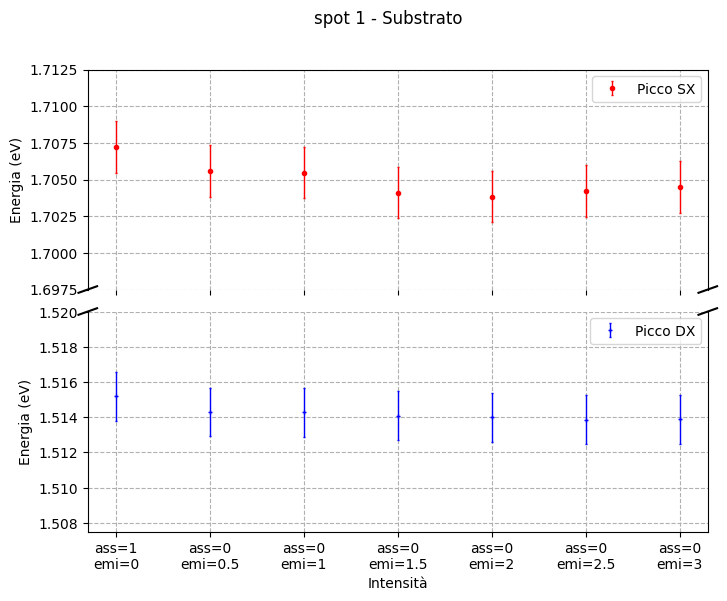

picco SX:
[1.7072427003111605, 1.7055910047235774, 1.7054769423694855, 1.7041013617462117, 1.7038378429100307, 1.7042161438093515, 1.7044936583472756]
errore picco SX:
[0.0017650768470024946, 0.0017616632030231741, 0.0017614275864743902, 0.0017585873152898151, 0.001758043468472004, 0.0017588242273454905, 0.001759397087819271]
picco DX:
[1.515181867228815, 1.514294290131007, 1.5142836305454106, 1.514069787741742, 1.5139856123870508, 1.5138496756864617, 1.513868472840627]
errore picco DX:
[0.0013902810970348519, 0.0013886527509446684, 0.0013886332007015496, 0.0013882410307754455, 0.0013880866753635775, 0.0013878374214074413, 0.0013878718865942385]


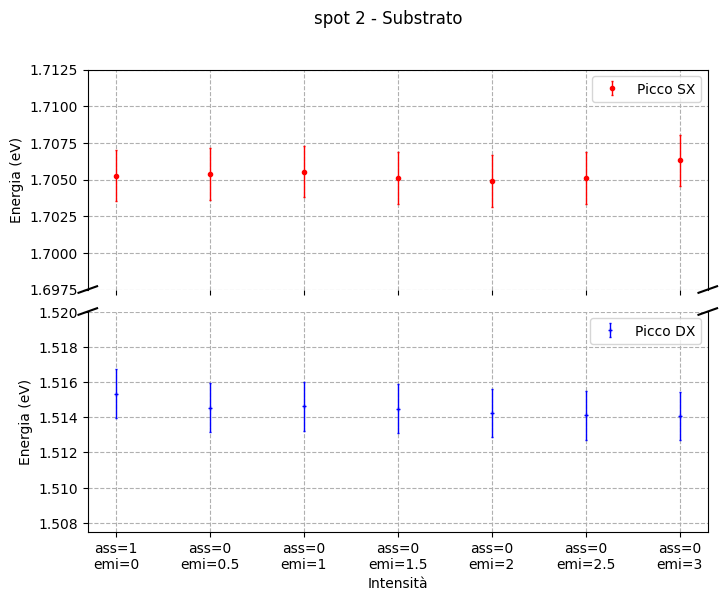

picco SX:
[1.7052725923829657, 1.7053707891973857, 1.7055445413845287, 1.7051155281072063, 1.7048934035592067, 1.7050904940994591, 1.7063005091920982]
errore picco SX:
[0.0017610055037945594, 0.0017612083219367169, 0.0017615672226391809, 0.001760681123613261, 0.0017602224273915378, 0.0017606294243816254, 0.0017631291674708293]
picco DX:
[1.5153388564676202, 1.5145271258098874, 1.514617645180088, 1.514468031176435, 1.514234606874736, 1.514104784530285, 1.514066436979438]
errore picco DX:
[0.0013905692082944645, 0.0013890798182133177, 0.001389245866593299, 0.001388971420602163, 0.0013885432904715298, 0.0013883052081861413, 0.0013882348861966355]


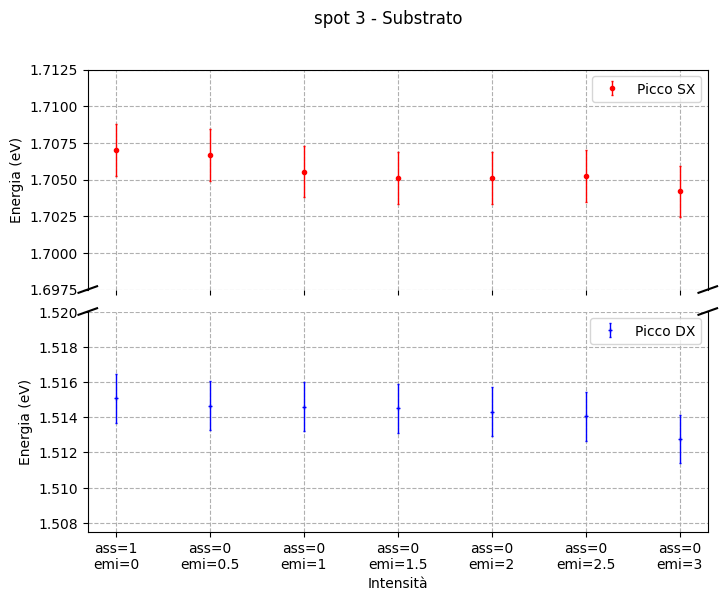

picco SX:
[1.707010528333857, 1.7066954450164002, 1.7055388912135878, 1.7051029639251756, 1.7050909235108298, 1.7052361256611717, 1.7041852298777331]
errore picco SX:
[0.001764596805685983, 0.0017639454403979996, 0.0017615555511299318, 0.0017606551764721213, 0.0017606303111784166, 0.0017609301874944804, 0.0017587604189149184]
picco DX:
[1.5150844784879416, 1.51465843660806, 1.5145888539562486, 1.5145113288776952, 1.5142951171458103, 1.5140523079777275, 1.512752610659109]
errore picco DX:
[0.0013901023813610897, 0.0013893206974735378, 0.001389193051008217, 0.001389050841399516, 0.001388654267739261, 0.0013882089767899097, 0.0013858266587288613]


In [97]:
for spot in arr_spot:
    # picco sx
    x1 = []
    y1 = []
    err_y1 = []
    # picco dx
    x2 = []
    y2 = []
    err_y2 = []
    
    i = 1

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x1.append(i)
            x2.append(i)
        
            # picco sx
            y1.append(data['spot'+str(spot)][ass][emi][0][0])
            err_y1.append(data['spot'+str(spot)][ass][emi][1][0])
            
            # picco dx
            y2.append(data['spot'+str(spot)][ass][emi][2][0])
            err_y2.append(data['spot'+str(spot)][ass][emi][3][0])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
    y1 = [y_val for y_val in y1 if y_val != 0]
    err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
    
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]
    err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

    # Primo asse: picco SX
    ax1.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX', markersize=3, elinewidth=1, capsize=1)
    ax1.set_ylim(1.6975, 1.7125)  # Intervallo per il primo picco

    # Secondo asse: picco DX
    ax2.errorbar(x2, y2, yerr=err_y2, fmt='b+', label='Picco DX', markersize=3, elinewidth=1, capsize=1)
    ax2.set_ylim(1.5075, 1.52)  # Intervallo per il secondo picco

    # Etichette personalizzate per l'asse x
    ax2.set_xticks(range(1, 8))
    ax2.set_xticklabels(etichette_x)

    # Rimuovi lo spazio tra i due subplot
    plt.subplots_adjust(hspace=0.1)

    # Personalizzazione degli assi spezzati
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.tick_params(labeltop=False)
    ax2.tick_params(labelbottom=True)

    # Linee diagonali per indicare il taglio
    d = 0.015  # Grandezza delle linee diagonali
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)  # Aggiorna per il secondo asse
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Titolo, etichette e legenda
    ax1.set_ylabel('Energia (eV)')
    ax2.set_ylabel('Energia (eV)')
    ax2.set_xlabel('Intensità')
    ax1.legend()
    ax2.legend()
    ax1.grid(linestyle='--')
    ax2.grid(linestyle='--')

    # Mostrare il grafico
    plt.suptitle('spot ' + str(spot) + ' - Substrato')
    plt.show()
    
    
    # STAMPA DEI VALORI
    print ('picco SX:')
    print (y1)
    print ('errore picco SX:')
    print (err_y1)
    
    print ('picco DX:')
    print (y2)
    print ('errore picco DX:')
    print (err_y2)

## REFERENCE + QD

### Estraggo i due picchi e il loro errore

In [82]:
raccoglitore_2['spot1']['ass=0']['emi=1'][0]['Regione 1'][1]

(np.float64(759.5386355552012),
 np.float64(0.1690544000804027),
 np.float64(23.233516117195975))

In [83]:
for spot in arr_spot:
    data['spot'+str(spot)] = {}
    for ass in d_o_ass:
        
        data['spot'+str(spot)][ass] = {}
        
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            
            data['spot'+str(spot)][ass][emi] = []
            arr_picchi_sx  = []
            arr_err_picchi_sx  = []
            arr_picchi_dx  = []
            arr_err_picchi_dx  = []
            
            #print(ass, ' | ', emi)
            
            if len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1']) == 1:
                picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][0]
                err_picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][1]
                picco_sx_2 = 0
                err_picco_sx_2 = 0
            elif len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1']) == 2:
                picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][0]
                err_picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][1]
                picco_sx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][1][0]
                err_picco_sx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][1][1]
            else:
                picco_sx_1, err_picco_sx_1 = 0, 0
                picco_sx_2, err_picco_sx_2 = 0, 0
                
            if len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2']) == 1:
                picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][0]
                err_picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][1]
                picco_dx_2, err_picco_dx_2 = 0, 0
            elif len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2']) == 2:
                picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][0]
                err_picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][1]
                picco_dx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][1][0]
                err_picco_dx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][1][1]
                
            else:
                picco_dx_1, err_picco_dx_1 = 0, 0
                picco_dx_2, err_picco_dx_2 = 0, 0
           
            # conversione dei nm in eV degli errori
            # err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            # err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx_1 = err_lambda_to_E(picco_sx_1, 0.7508320802)
            err_picco_dx_1 = err_lambda_to_E(picco_dx_1, 0.7508320802)
            
            err_picco_sx_2 = err_lambda_to_E(picco_sx_2, 0.7508320802)
            err_picco_dx_2 = err_lambda_to_E(picco_dx_2, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx_1 = lambda_to_E(picco_sx_1)
            picco_dx_1 = lambda_to_E(picco_dx_1)
            picco_sx_2 = lambda_to_E(picco_sx_2)
            picco_dx_2 = lambda_to_E(picco_dx_2)
                        
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx_1)
            arr_picchi_sx.append(picco_sx_2)
            arr_err_picchi_sx.append(err_picco_sx_1)
            arr_err_picchi_sx.append(err_picco_sx_2)
            arr_picchi_dx.append(picco_dx_1)
            arr_picchi_dx.append(picco_dx_2)
            arr_err_picchi_dx.append(err_picco_dx_1)    
            arr_err_picchi_dx.append(err_picco_dx_2)    
            
            # riempimento del contenitore data    
            data['spot'+str(spot)][ass][emi].append(arr_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_picchi_dx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_dx)
                        

### Plot

Un grafico per ciascun spot. ass=1,emi=0 viene messo per primo in ordinata.

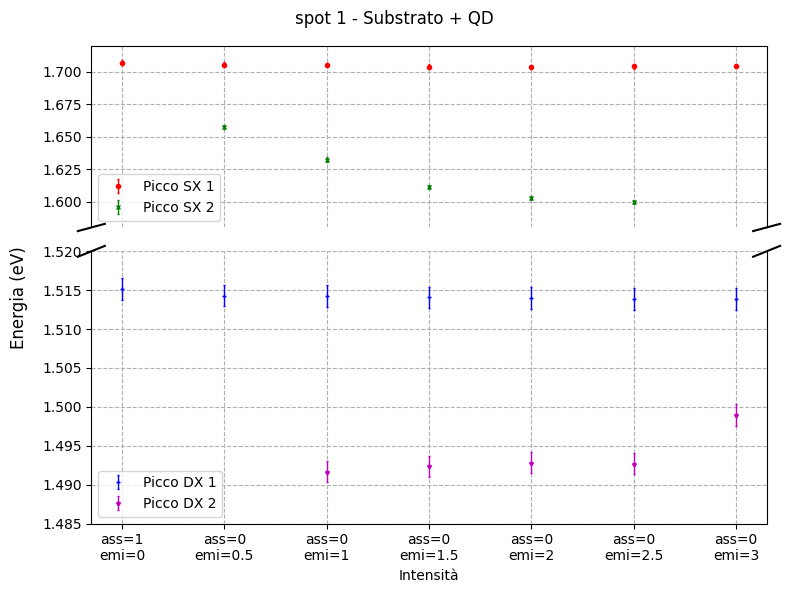

picco SX 1:
[1.7072427003111605, 1.7055910047235774, 1.7054769423694855, 1.7041013617462117, 1.7038378429100307, 1.7042161438093515, 1.7044936583472756]
errore picco SX 1:
[0.0017650768470024946, 0.0017616632030231741, 0.0017614275864743902, 0.0017585873152898151, 0.001758043468472004, 0.0017588242273454905, 0.001759397087819271]
picco SX 2:
[1.6577282879857063, 1.6323747213258, 1.6110718957843513, 1.6028377232503335, 1.5992936697336186]
errore picco SX 2:
[0.0016641780374241231, 0.0016136628873171651, 0.0015718204422701422, 0.0015557943842232581, 0.0015489219196637282]
picco DX 1:
[1.515181867228815, 1.514294290131007, 1.5142836305454106, 1.514069787741742, 1.5139856123870508, 1.5138496756864617, 1.513868472840627]
errore picco DX 1:
[0.0013902810970348519, 0.0013886527509446684, 0.0013886332007015496, 0.0013882410307754455, 0.0013880866753635775, 0.0013878374214074413, 0.0013878718865942385]
picco DX 2:
[1.4916280281788445, 1.492383697854087, 1.4927880885131504, 1.492705224295247, 1.

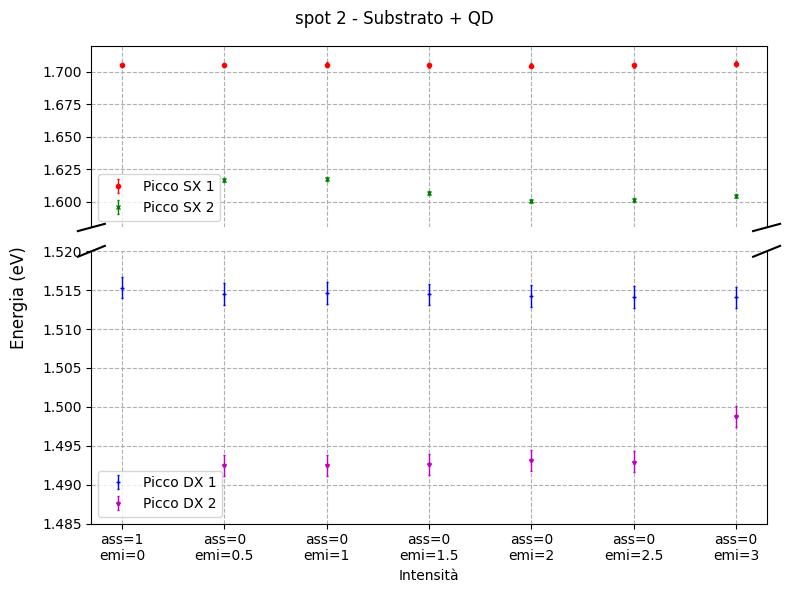

picco SX 1:
[1.7052725923829657, 1.7053707891973857, 1.7055445413845287, 1.7051155281072063, 1.7048934035592067, 1.7050904940994591, 1.7063005091920982]
errore picco SX 1:
[0.0017610055037945594, 0.0017612083219367169, 0.0017615672226391809, 0.001760681123613261, 0.0017602224273915378, 0.0017606294243816254, 0.0017631291674708293]
picco SX 2:
[1.6165563151857965, 1.6170648968387433, 1.6067322973855378, 1.6006724900757796, 1.6013471450825654, 1.604585861649369]
errore picco SX 2:
[0.0015825402562843823, 0.0015835361727744323, 0.0015633641060335002, 0.0015515938563129862, 0.001552902070419195, 0.0015591898958360066]
picco DX 1:
[1.5153388564676202, 1.5145271258098874, 1.514617645180088, 1.514468031176435, 1.514234606874736, 1.514104784530285, 1.514066436979438]
errore picco DX 1:
[0.0013905692082944645, 0.0013890798182133177, 0.001389245866593299, 0.001388971420602163, 0.0013885432904715298, 0.0013883052081861413, 0.0013882348861966355]
picco DX 2:
[1.4924930480363983, 1.4924648408096486

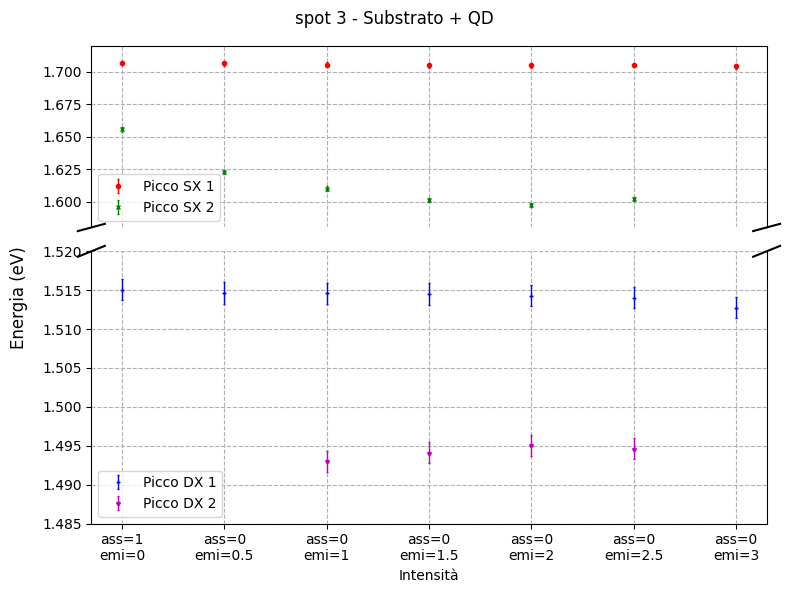

picco SX 1:
[1.707010528333857, 1.7066954450164002, 1.7055388912135878, 1.7051029639251756, 1.7050909235108298, 1.7052361256611717, 1.7041852298777331]
errore picco SX 1:
[0.001764596805685983, 0.0017639454403979996, 0.0017615555511299318, 0.0017606551764721213, 0.0017606303111784166, 0.0017609301874944804, 0.0017587604189149184]
picco SX 2:
[1.655582395524917, 1.6230575625356833, 1.61003749336986, 1.6012696591556828, 1.5973232361774659, 1.6018419835811215]
errore picco SX 2:
[0.00165987234300548, 0.0015952947442905345, 0.0015698026888662482, 0.0015527517905183765, 0.0015451075263178545, 0.001553861955301052]
picco DX 1:
[1.5150844784879416, 1.51465843660806, 1.5145888539562486, 1.5145113288776952, 1.5142951171458103, 1.5140523079777275, 1.512752610659109]
errore picco DX 1:
[0.0013901023813610897, 0.0013893206974735378, 0.001389193051008217, 0.001389050841399516, 0.001388654267739261, 0.0013882089767899097, 0.0013858266587288613]
picco DX 2:
[1.4930386024202054, 1.49411346530348, 1.49

In [101]:
for spot in arr_spot:
    # picco sx 1
    x1 = []
    y1 = []
    err_y1 = []
    # picco sx 2
    x2 = []
    y2 = []
    err_y2 = []
    # picco dx 1
    x3 = []
    y3 = []
    err_y3 = []
    # picco dx 2
    x4 = []
    y4 = []
    err_y4 = []
    
    i = 1
    

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x1.append(i)
            x2.append(i)
            x3.append(i)
            x4.append(i)
        
            # picco sx 1
            y1.append(data['spot'+str(spot)][ass][emi][0][0])
            err_y1.append(data['spot'+str(spot)][ass][emi][1][0])
            # picco sx 2
            y2.append(data['spot'+str(spot)][ass][emi][0][1])
            err_y2.append(data['spot'+str(spot)][ass][emi][1][1])
            
            # picco dx 1
            y3.append(data['spot'+str(spot)][ass][emi][2][0])
            err_y3.append(data['spot'+str(spot)][ass][emi][3][0])
            # picco dx 2
            y4.append(data['spot'+str(spot)][ass][emi][2][1])
            err_y4.append(data['spot'+str(spot)][ass][emi][3][1])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
    y1 = [y_val for y_val in y1 if y_val != 0]
    err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
    
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]
    err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
    
    x3 = [x_val for x_val, y_val in zip(x3, y3) if y_val != 0]
    y3 = [y_val for y_val in y3 if y_val != 0]
    err_y3 = [e_y_val for e_y_val in err_y3 if e_y_val != 0]
    
    x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
    y4 = [y_val for y_val in y4 if y_val != 0]
    err_y4 = [e_y_val for e_y_val in err_y4 if e_y_val != 0]
    
    # Creazione della figura
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 6]}, figsize=(8, 6))

    # Plot superiore (range > 1.59)
    ax1.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX 1', markersize=3, elinewidth=1, capsize=1)
    ax1.errorbar(x2, y2, yerr=err_y2, fmt='gx', label='Picco SX 2', markersize=3, elinewidth=1, capsize=1)
    ax1.errorbar(x3, y3, yerr=err_y3, fmt='b+', markersize=3, elinewidth=1, capsize=1)
    ax1.errorbar(x4, y4, yerr=err_y4, fmt='m*', markersize=3, elinewidth=1, capsize=1)
    ax1.set_ylim(1.58, 1.72)  # Intervallo superiore
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(bottom=False)
    ax1.grid(linestyle='--')
    
    # Plot inferiore (range < 1.54)
    ax2.errorbar(x1, y1, yerr=err_y1, fmt='ro', markersize=3, elinewidth=1, capsize=1)
    ax2.errorbar(x2, y2, yerr=err_y2, fmt='gx', markersize=3, elinewidth=1, capsize=1)
    ax2.errorbar(x3, y3, yerr=err_y3, fmt='b+', label='Picco DX 1', markersize=3, elinewidth=1, capsize=1)
    ax2.errorbar(x4, y4, yerr=err_y4, fmt='m*', label='Picco DX 2', markersize=3, elinewidth=1, capsize=1)
    ax2.set_ylim(1.485, 1.52)  # Intervallo inferiore
    ax2.spines['top'].set_visible(False)
    ax2.grid(linestyle='--')

    # Aggiunta della "scaletta" per indicare il break
    d = 0.02  # Distanza delle linee spezzate
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)  # Linea spezzata in alto
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Linea spezzata in basso
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Etichette e titolo
    ax2.set_xlabel('Intensità')
    ax2.set_xticks(range(1, 8))
    ax2.set_xticklabels(etichette_x)
    ax1.legend()
    ax2.legend()
    fig.supylabel('Energia (eV)')
    fig.suptitle('spot ' + str(spot) + ' - Substrato + QD')
    
    # Mostrare il grafico
    plt.tight_layout()
    plt.show()
    
    # STAMPA DEI VALORI
    print ('picco SX 1:')
    print (y1)
    print ('errore picco SX 1:')
    print (err_y1)
    print ('picco SX 2:')
    print (y2)
    print ('errore picco SX 2:')
    print (err_y2)
    
    print ('picco DX 1:')
    print (y3)
    print ('errore picco DX 1:')
    print (err_y3)
    print ('picco DX 2:')
    print (y4)
    print ('errore picco DX 2:')
    print (err_y4)
    
            

## Stampa dei valori